In [46]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import time  
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_file = "/content/drive/MyDrive/Colab Notebook_2022_2semester/datamining/data/cars.csv"
car = pd.read_csv(data_file)
print(car.shape)
car.head()

(50, 2)


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


# 2 번 -(a)

In [10]:
## 단순선형회귀분석 적합
carsFit = smf.ols(formula='dist~ speed', data= car).fit()
print(carsFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.49e-12
Time:                        00:34:47   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

- dist = -17.5791 +  3.9324 * speed 
- speed 가 1 증가할 때마다 dist는 3.9324씩 증가한다.

# 2 번 - (b)

In [11]:
## 적합된 모형을 이용한 적합값 및 신뢰구간
predictions = carsFit.get_prediction()
predictions.summary_frame(alpha=0.05).round(3).iloc[0:3]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-1.849,5.212,-12.330,8.631,-34.500,30.801
1,-1.849,5.212,-12.330,8.631,-34.500,30.801
2,9.948,4.113,1.679,18.217,-22.061,41.957


      Fitted   Residual  RStandard
0  -1.849460   3.849460   0.250297
1  -1.849460  11.849460   0.770467
2   9.947766  -5.947766  -0.386731
3   9.947766  12.052234   0.783651
4  13.880175   2.119825   0.137834


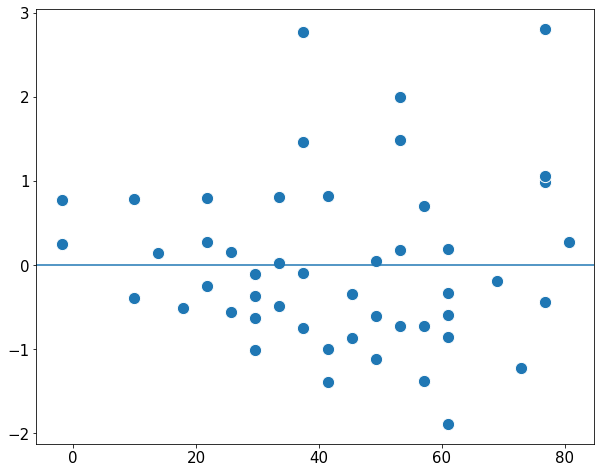

In [15]:
Fitted = carsFit.predict()
Residual = carsFit.resid
RStandard = carsFit.resid_pearson

## 잔차, 표준화잔차의 탐색
print(pd.DataFrame({'Fitted': Fitted, 'Residual': Residual, \
                    'RStandard': RStandard}).iloc[0:5])

## 잔차 도표
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=Fitted,y=RStandard, s=150)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.axhline(y=0)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([-1.89010802, -1.39191233, -1.37433287, -1.22671089, -1.12303759,
         -1.01496942, -1.00178482, -0.86734744, -0.84976798, -0.74609467,
         -0.7285152 , -0.72412034, -0.6248419 , -0.60286757, -0.58968296,
         -0.56421552, -0.507984  , -

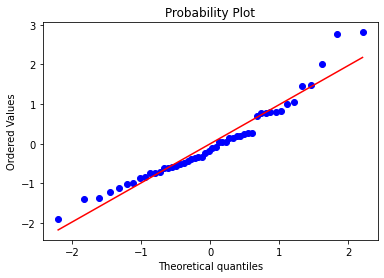

In [16]:
from scipy.stats import probplot
## Q-Q plot
probplot(RStandard, plot=plt)

In [17]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(Residual).round(5))
print(durbin_watson(RStandard).round(5))

1.67623
1.67623


- 잔차분석 결과, 일정 패턴이 없어 선형성 만족하지만, 점점 증가하는 경향을 보이므로 등분산성 가정을 의심해 볼 수 있다.
- qq plot을 이용한 정규성 검토, (더빈-왓슨 통계량) 독립성 가정 검토를 한 결과, 1.67623로 독립성 가정에 큰 문제가 없음.

# 3 -(a)


In [18]:
## the import load_diabetes function
from sklearn.datasets import load_diabetes
## load the data
diabetes = load_diabetes(as_frame=True)
## split the data into two parts: x and y
x_diabetes = diabetes.data
y_diabetes = diabetes.target
## standardization process
x_diabetes /= x_diabetes.std()

In [21]:
pca = PCA(n_components = 10)
pca_components = pca.fit_transform(x_diabetes)
pca_x = pd.DataFrame(data=pca_components,columns=
                        ['pc1','pc2','pc3','pc4','pc5',
                         'pc6','pc7','pc8','pc9','pc10'])
pca_x.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.586543,-1.944624,0.588566,-0.082718,-0.256339,-1.010069,-0.179604,0.756587,-0.180872,-0.048901
1,-2.828407,1.370532,0.027883,-0.469467,-0.143067,-1.011868,0.224160,-0.188194,0.504548,0.043540
2,0.271840,-1.633048,0.738434,-0.790579,-1.162504,-1.111546,-0.461883,0.842281,-0.025332,-0.054125
3,0.049254,0.381821,-2.010758,1.371685,0.255239,0.444811,0.481601,-0.367419,-0.137721,-0.074501
4,-0.755595,0.811049,-0.057194,-0.137364,-0.133194,-0.813669,0.435957,-1.058588,0.044248,-0.010881


Text(0, 0.5, 'Propotion of Variance')

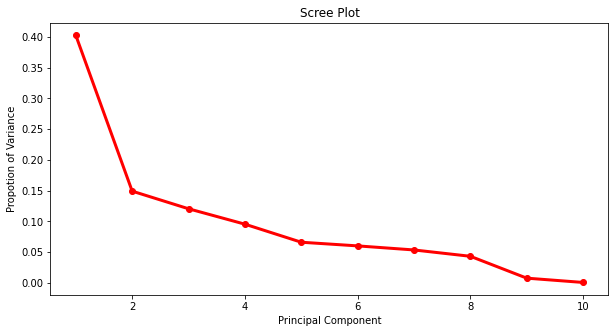

In [22]:
fig = plt.figure(figsize = (10, 5))
sing_vals = np.arange(10) + 1
plt.plot(sing_vals, pca.explained_variance_ratio_, 
         'ro-', linewidth = 3)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Propotion of Variance')

# 3-(b)

In [23]:
y_diabetes.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [24]:
pca_diabetes = pd.concat([y_diabetes, pca_x[['pc1', 'pc2', 'pc3', 'pc4', 'pc5']]], axis=1)
## 선형모형 적합
pcalmfit = smf.ols(formula='target ~ pc1+pc2+pc3+pc4+pc5', data= pca_diabetes).fit()
print(pcalmfit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     87.33
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.75e-63
Time:                        00:52:56   Log-Likelihood:                -2393.8
No. Observations:                 442   AIC:                             4800.
Df Residuals:                     436   BIC:                             4824.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.607     58.361      0.0

target = 152.1335 + 21.3426pc1 -12.2261pc2 + 11.3450pc3 + 28.2430pc4 -0.7939pc5

# 5-(a)

In [50]:
import os
import numpy as np
import pandas as pd
import time  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix   #오차행렬

In [25]:
## the import load_breast_cancer function
from sklearn.datasets import load_breast_cancer
## load the data
cancer = load_breast_cancer(as_frame=True)
## split the data into two parts: x and y
x_cancer = cancer.data
y_cancer = cancer.target

In [43]:
train_x_cancer = x_cancer.iloc[0:400,:]
test_x_cancer = x_cancer.iloc[400:,:]

train_y_cancer = y_cancer.iloc[0:400]
test_y_cancer = y_cancer.iloc[400:]

In [53]:
print(x_cancer.shape)
print(train_x_cancer.shape)
print(train_y_cancer.shape)
print(test_x_cancer.shape)
print(test_y_cancer.shape)

(569, 30)
(400, 30)
(400,)
(169, 30)
(169,)


In [64]:
logistic = LogisticRegression(penalty='none')
logistic.fit(train_x_cancer, train_y_cancer)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [65]:
print(logistic.intercept_)
print(logistic.coef_)

[0.44330449]
[[ 2.44992216  0.35194594  0.05243698 -0.01151286 -0.09567078 -0.45825277
  -0.59958369 -0.26306172 -0.12865214 -0.03115407  0.09819818  1.10197444
   0.61914037 -0.17613648 -0.00892697 -0.09582444 -0.12270905 -0.03301484
  -0.04491359 -0.00819708  2.56629291 -0.62673228 -0.39362608 -0.0236393
  -0.17036701 -1.46649734 -1.72927545 -0.51674901 -0.4652119  -0.14773092]]


# 5 - (b)

In [57]:
import sklearn.metrics

In [66]:
test_prob = logistic.predict_proba(test_x_cancer)[:,1]                       # [0일 확률. 1일 확률] 증 y가 1일 추정확률값 = score 만 뽑음             /// predict_log_prob
cut_off = 0.4
test_y_pred = np.array((test_prob > cut_off)).astype(dtype='int')            # cut off보다 크면, true = 1 / 작으면 0

print(sklearn.metrics.confusion_matrix(test_y_cancer, test_y_pred))          # 오차행렬

print('정분류율: ', (test_y_pred==test_y_cancer).mean())  
print('정밀도: ', sklearn.metrics.precision_score(test_y_cancer, test_y_pred))                      
print('민감도: ', sklearn.metrics.recall_score(test_y_cancer, test_y_pred))  
print('특이도: ', sklearn.metrics.recall_score(test_y_cancer, test_y_pred, pos_label=0))
print('f1_score: ', sklearn.metrics.f1_score(test_y_cancer, test_y_pred))

[[ 39   0]
 [  9 121]]
정분류율:  0.9467455621301775
정밀도:  1.0
민감도:  0.9307692307692308
특이도:  1.0
f1_score:  0.9641434262948207


# 5 - (c)

 ROC-AUC값 :  0.9964497041420118


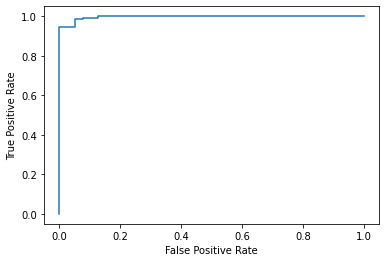

In [69]:
fpr, tpr, _ = sklearn.metrics.roc_curve(test_y_cancer, test_prob)
roc_display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(' ROC-AUC값 : ', sklearn.metrics.auc(fpr, tpr))

- ROC-AUC값 :  0.9964497041420118